Atividade

Em vez de um unico outlier, adicione varios gerados aleatoriamente aos dados. Experimente diferentes valores do multiplo do desvio padrao para identificar valores discrepantes.

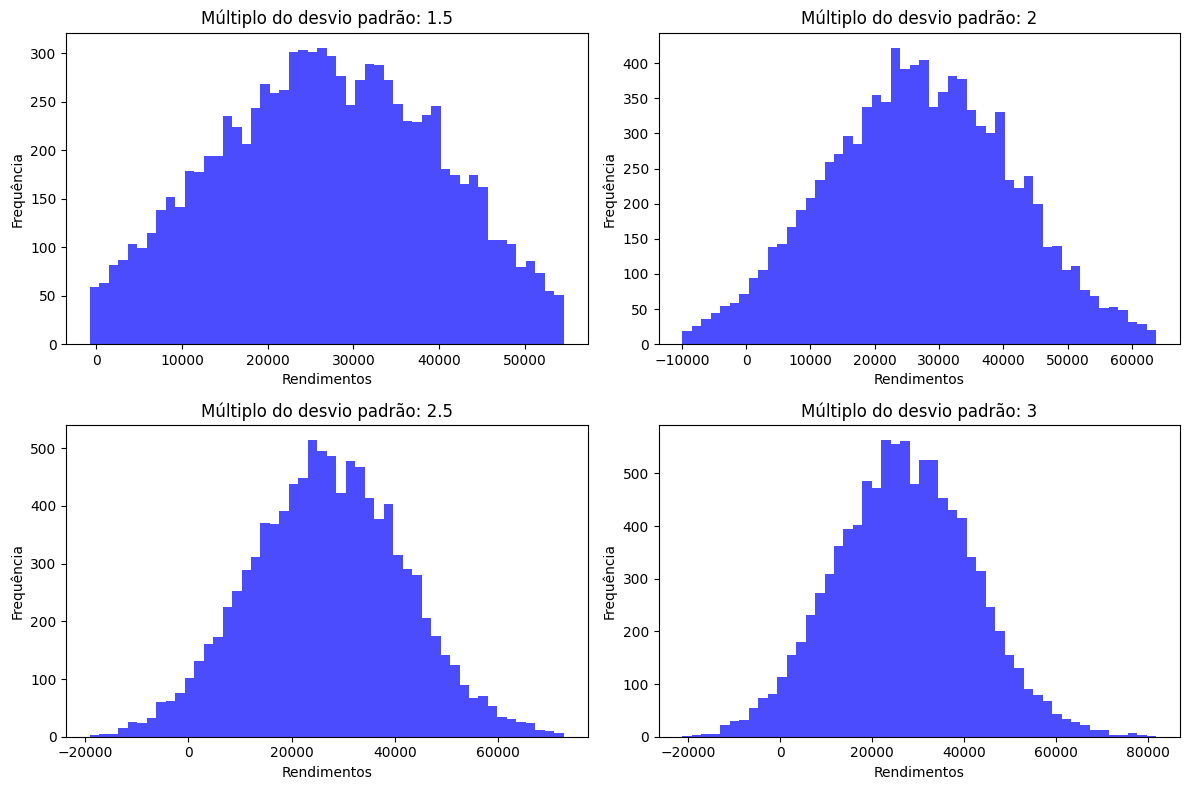

In [1]:
%matplotlib inline  
import numpy as np  # Biblioteca para cálculos numéricos
import matplotlib.pyplot as plt  # Biblioteca para plotagem de gráficos

# Gerar uma distribuição normal de rendimentos com média 27.000 e desvio padrão de 15.000, com 10.000 pontos de dados
incomes = np.random.normal(27000, 15000, 10000)

# Adicionar vários outliers aleatórios ao conjunto de dados
outliers = np.random.uniform(200000, 500000, 10)  # 10 outliers entre 200.000 e 500.000
incomes = np.append(incomes, outliers)  # Adicionar os outliers aos rendimentos

# Função para rejeitar outliers com múltiplos ajustáveis do desvio padrão
def reject_outliers(data, multiple=2):
    u = np.median(data)  # Mediana dos dados
    s = np.std(data)     # Desvio padrão dos dados
    # Filtrar dados com base no múltiplo ajustável
    filtered = [e for e in data if (u - multiple * s < e < u + multiple * s)]
    return filtered

# Experimentar diferentes múltiplos do desvio padrão
multiples = [1.5, 2, 2.5, 3]

plt.figure(figsize=(12, 8))  # Define o tamanho da figura do gráfico

# Plotar os resultados para diferentes múltiplos
for i, multiple in enumerate(multiples, start=1):
    filtered = reject_outliers(incomes, multiple)  # Rejeitar outliers com base no múltiplo atual
    plt.subplot(2, 2, i)  # Criar um subplot (2x2 grid) na posição i
    plt.hist(filtered, 50, color='blue', alpha=0.7)  # Plotar um histograma dos dados filtrados
    plt.title(f"Múltiplo do desvio padrão: {multiple}")  # Título do subplot
    plt.xlabel('Rendimentos')  # Rótulo do eixo x
    plt.ylabel('Frequência')  # Rótulo do eixo y

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()  # Exibe o gráfico
